In [15]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

In [16]:

# Constants
noreflector_pte_8 = 0.001405
noreflector_pte_4 = 0.00129
A_alpha_8 = 2.1  # alpha amplitude ratio
A_alpha_4 = 1.8

lit_value = (1.902, 0.8398)

# Load the CSV file
df = pd.read_csv("../Silicon-Analysis-08-2024/complex_n_silicon_2dsweep_v2.csv")

# Load gradient descent path
gradient_steps = pd.read_csv("output.csv", header=None).values  # Ensure it's a NumPy array

# Extract the data
k_si = df["k_si"].unique()
n_si = df["n_si"].unique()
pte_8 = df["pte_8"].values.reshape(len(k_si), len(n_si)).T
pte_4 = df["pte_4"].values.reshape(len(k_si), len(n_si)).T

# Calculate the score
score = -(
    (A_alpha_8 - pte_8 / noreflector_pte_8) ** 2
    + (A_alpha_4 - pte_4 / noreflector_pte_4) ** 2
)

# Find the minimum and maximum scores
score_min = np.min(score)
score_max = np.max(score)

# Create a custom color scale
colors = [
    (0, "rgb(0,0,130)"),
    (0.3, "rgb(0,60,200)"),
    (0.8, "rgb(5,255,255)"),
    (0.85, "rgb(255,255,0)"),
    (0.9, "rgb(250,0,0)"),
    (0.95, "rgb(255,0,0)"),
    (1, "rgb(255,255,255)"),
]

# Create the heatmap
fig = go.Figure(
    data=go.Heatmap(
        z=score,
        x=k_si,
        y=n_si,
        colorscale=colors,
        colorbar=dict(title="Score"),
        zmin=score_min,
        zmax=score_max,
    )
)

# Add literature value as a marker
fig.add_trace(
    go.Scatter(
        x=[lit_value[0]],
        y=[lit_value[1]],
        mode="markers+text",
        marker=dict(
            size=20,
            color="black",
            line=dict(width=2, color="black"),
            symbol="hexagram-open-dot",
        ),
        name="Literature Value",
        text=["Literature Value"],
        textposition="bottom center",
    )
)

# Add gradient descent steps
fig.add_trace(
    go.Scatter(
        x=gradient_steps[:, 1],  # k_si values
        y=gradient_steps[:, 0],  # n_si values
        mode="markers+lines",
        marker=dict(size=10, color="purple", symbol="circle"),
        line=dict(width=2, color="black"),
        name="Gradient Descent Path",
    )
)

# Update the layout
fig.update_layout(
    title="Score vs Complex Refractive Index of Silicon",
    xaxis_title="k_si",
    yaxis_title="n_si",
    width=1000,
    height=800,
    font=dict(size=23),
)

# Show the plot
fig.show()

# Find the maximum score and its corresponding n_si and k_si
max_score = np.max(score)
max_index = np.unravel_index(score.argmax(), score.shape)
best_n_si = n_si[max_index[0]]
best_k_si = k_si[max_index[1]]


In [ ]:
short_8_sweep = np.fliplr(np.loadtxt('../../../Sweep-Txt-Files/matrix_8_short_n_0.2-1.2_sr_0-1.txt'))
gradient_steps = pd.read_csv("output_8_short.csv", header=None).values

alpha_8 = 2.46
pte_short_no_reflector = 0.0013598

short_8_ratio = short_8_sweep/pte_short_no_reflector


def apply_score_function(pte_arr, alpha_ratio):
    return -np.abs(pte_arr - alpha_ratio)**(0.5)

def apply__modified_score_function(pte_arr, alpha_ratio):
    return -np.abs(pte_arr - alpha_ratio)**(0.5)

scored_8 = apply_score_function(short_8_ratio, alpha_8)


In [30]:
def plot_heatmap(array, color_scheme, colorbar_label, title, ax, vmin = None, vmax = None):
    if ax is None:
            fig, ax = plt.subplots(figsize=(6, 6))  # Create a new figure and axis if ax is None
    cax = ax.imshow(array, cmap=color_scheme)

    if vmin and vmax:
        cax = ax.imshow(array, cmap=color_scheme, vmin = vmin, vmax = vmax)
    

    x_positions = np.linspace(0, 256, 6)
    x_labels = np.linspace(0.2, 1.2, 6)

    ax.set_xticks(x_positions)
    ax.set_xticklabels([f"{x:.1f}" for x in x_labels])

    y_positions = np.linspace(0, 256, 6)
    y_labels = np.linspace(1, 0, 6)

    ax.set_yticks(y_positions)
    ax.set_yticklabels([f"{y:.1f}" for y in y_labels])

    cbar = plt.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label(colorbar_label)
    
    ax.set_title(title)
    ax.set_xlabel('Real Part of Refractive Index (n)')
    ax.set_ylabel('Specular Ratio')


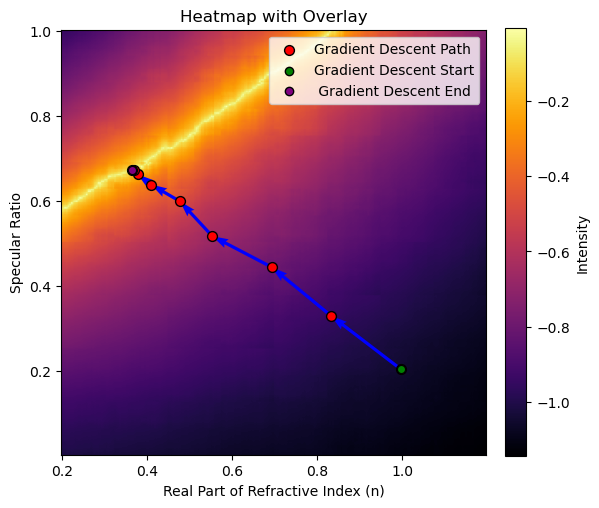

In [55]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the heatmap
plot_heatmap(scored_8, color_scheme="inferno", colorbar_label="Intensity", title="Heatmap with Overlay", ax=ax)

# Extract real axis scales from the heatmap ticks
x_min, x_max = 0.2, 1.2  # From your xticklabels
y_min, y_max = 1, 0  # From your yticklabels

# Map gradient steps to the heatmap coordinate system
x_mapped = 255 * (gradient_steps[:, 0] - x_min) / (x_max - x_min)  # Scale x values
y_mapped = 255 * (gradient_steps[:, 1] - y_min) / (y_max - y_min)  # Scale y values

# Scatter the transformed points

ax.quiver(
    x_mapped[:-1], y_mapped[:-1],  # Start points (x, y)
    x_mapped[1:] - x_mapped[:-1],  # Arrow delta x
    y_mapped[1:] - y_mapped[:-1],  # Arrow delta y
    angles="xy", scale_units="xy", scale=1, color="blue"
)
ax.scatter(x_mapped, y_mapped, color="red", edgecolor="black", s=50, label="Gradient Descent Path")

ax.scatter(x_mapped[0], y_mapped[0], color="green", label="Gradient Descent Start", edgecolor="black", marker="o")
ax.scatter(x_mapped[-1], y_mapped[-1], color="purple",  label=" Gradient Descent End", edgecolor="black", marker="o")

# Show legend
ax.legend()

# Display the plot
plt.show()
